# Thermoforming Machines- Defective Parts (Gaussian Mix Clustering)

## Project Description
A factory has 200 thermoforming machines. Some of these machines are new and some are old from different brands. Each machine is identified with an ID number. The foreman is interested in analyzing the number of defective lids per day; to see if there is any pattern on how these machine performs.
The file 'ThermoFormingDefectiveParts.csv' summarizes the average number of defective parts per day and the age of the machine (in month) for each machine.
In order to start the investigation, the foreman wants to see if he can groups these machines to few groups. We will try to see if we could cluster these machines to an optimum number of clusters.

This is how the coffee cup lid are produced in a factory: https://www.youtube.com/watch?app=desktop&v=YI3Cwyx1tR8

Background information: Thermoforming is usually used to manufacture relatively simple geometries from thin plastic sheets. For example, the lids of disposable coffee cups, pill blister packaging, inexpensive plastic packaging, and large items such as bathtubs and internal door liners for refrigerators. Thermoforming is also used to manufacture large components such as automotive interior panels and small boat hulls. In thermoforming products, dimensional tolerances are typically less critical, and production has lower cost due to lower cost of thermoform tooling compared to injection mold tooling.
Watch this short video: https://www.youtube.com/watch?v=alq3RDZN4jo

AT UBC, FF219, we have 4 thermoforming machine. Students are allowed to use these machines. For example, you can make your own hat 🤠 or a Halloween Mask 🤖 or whatever 👓.
This is how students made their Halloween Masks: https://www.youtube.com/watch?v=2AqNvkXJR54&t=4s

## Importing the Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [30]:
dataset = pd.read_csv('ThermoFormingDefectiveParts.csv')
dataset

,MachineID,Period of Operations (Month),Number of Defective Parts Per Day
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [31]:
X = dataset.iloc[:, [1, 2]].values

## Finding the Optimal Number of Clusters

### Elbow Method
In this method, WCSS (Within-Cluster Sum of Square), which is the sum of squared distance between each point and the centroid in a cluster, is used as a metric for finding the optimum number of cluster.<br>
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10 here. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

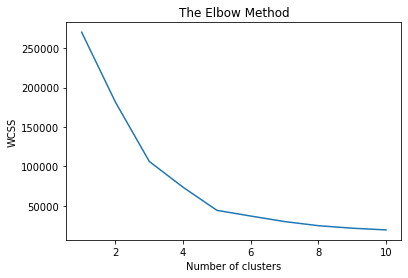

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score Method
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.<br>
1: Means clusters are well apart from each other and clearly distinguished.<br>
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.<br>
-1: Means clusters are assigned in the wrong way.<br>
silhouette score=(b-a)/(max⁡(a,b))  

In [33]:
from sklearn.metrics import silhouette_score

##### Finding the score for a certain number of cluster

In [34]:
# Finding the score for any number of clusters
i=5
km = KMeans(n_clusters=i, random_state=42)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
score

0.553931997444648

Note: The "labels_" attribute in "km.labels_" is usually used after "fit(X)" or "fit_predict()" methods and it contains all the labels.

##### Finding the score for a a range numbers of cluster & Plotting the scores

In [35]:
SH = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    SH.append(score)

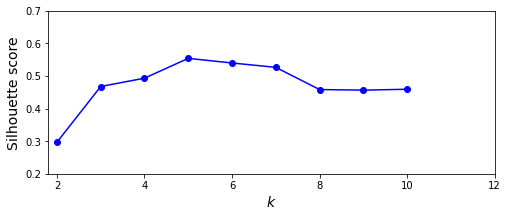

In [36]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), SH, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 12, 0.2, 0.7])
plt.show()

## Gaussian Mixture Method
Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.
The first difference between k-means and Gaussian Mixture models is that K-Mean performs hard classification whereas the GM performs soft classification. In other words, k-means tells us what data point belong to which cluster but won’t provide us with the probabilities that a given data point belongs to each of the possible clusters.
Second, k-means does not account for variance.<br>
If you are interested in detailed math and to learn “How the Algorithm Works”: https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e 


In [37]:
from sklearn.mixture import GaussianMixture

# The method fits the model n_init times and
# sets the parameters with which the model has the largest likelihood or lower bound.

GM=GaussianMixture(n_components = 5, n_init =10)
GM.fit(X)
y_GM = GM.predict(X)

In [38]:
# Result of Grouping/labelling of the inputs by the GMM clustering algorithm.
pd.DataFrame(y_GM)

,0
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,2
197,1
198,2


In [39]:
y_GM

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [40]:
y_GM == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Visualising the Clusters

In [41]:
#Another way to visualize 
#The mean of each mixture component
Centers=GM.means_
Centers

array([[27.03119094, 22.16675827],
       [86.24063303, 82.02037464],
       [88.81300265, 16.12462277],
       [55.710366  , 49.40699488],
       [25.11748524, 80.12817162]])

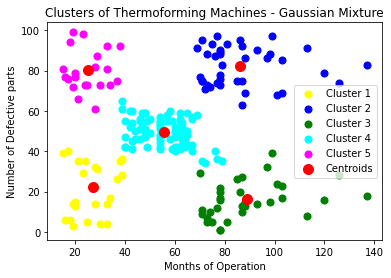

In [42]:
plt.scatter(X[y_GM == 0, 0], X[y_GM == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_GM == 1, 0], X[y_GM == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_GM == 2, 0], X[y_GM == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_GM == 3, 0], X[y_GM == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_GM == 4, 0], X[y_GM == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids') 

plt.scatter(Centers[:,0],Centers[:,1], s = 100, c = 'red', label = 'Centroids')

plt.title('Clusters of Thermoforming Machines - Gaussian Mixture')
plt.xlabel('Months of Operation')
plt.ylabel('Number of Defective parts')
plt.legend()
plt.show()

## Probability Being belong to a Cluster
GMM contains a probabilistic model under the hood, so, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster. <br>
For in-depth study of GMM:<br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [43]:
probs = GM.predict_proba(X)
print(probs[:200].round(3))

[[0.999 0.    0.    0.    0.001]
 [0.    0.    0.    0.    1.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.998 0.    0.    0.    0.002]
 [0.    0.    0.    0.    1.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.001 0.998]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.999]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [1.    0.    0.    0.    0.   ]
 [0.003 0.    0.    0.013 0.983]
 [1.    0.    0.    0.    0.   ]
 [0.    0.001 0.    0.    0.999]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.002 0.997]
 [0.999 0.    0.001 0.    0.   ]
 [0.    0.001 0.    0.003 0.996]
 [0.999 0.    0.001 0.    0.   ]
 [0.    0.002 0.    0.    0.998]
 [1.    0.    0.    0.    0.   ]
 [0.046 0.    0.    0.279 0.675]
 [1.    0.    0.    0.    0.   ]
 [0.    0.003 0.    0.    0.997]
 [0.994 0.

In [44]:
print(probs[0].round(3))

[0.999 0.    0.    0.    0.001]
